Bangalore 413
Mumbai 303
New Delhi 215
Gurgaon 166
Noida 46


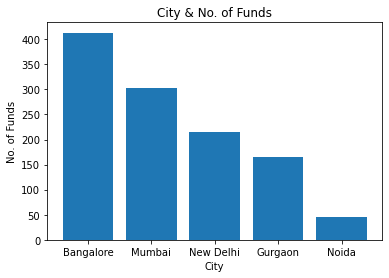

In [5]:
## 1
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Desktop/startup_funding.csv')
df.dropna(subset=['CityLocation','AmountInUSD'],inplace=True)

df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

city=[]
for i in df.CityLocation:
    temp=i.split('/')
    for j in temp:
        city.append(j.strip())

d={}
for i in city:
    d[i]=d.get(i,0)+1

investors={'Bangalore':d['Bangalore'],'Noida':d['Noida'],'New Delhi':d['New Delhi'],'Gurgaon':d['Gurgaon'],'Mumbai':d['Mumbai']}

sorted_d = sorted(investors,key=investors.get,reverse=True)
bar={}
for i in sorted_d:
    print(i,d[i])
    bar[i]=d[i]

plt.bar(bar.keys(),bar.values())
plt.title('City & No. of Funds')
plt.xlabel('City')
plt.ylabel('No. of Funds')
plt.show()

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


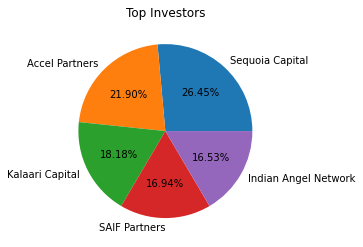

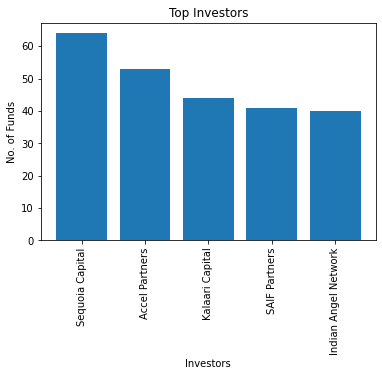

In [7]:
## 2
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Desktop/startup_funding.csv')

df=df.dropna(subset=['InvestorsName'])
df=df[df.InvestorsName!='Undisclosed Investors']
df=df[df.InvestorsName!='Undisclosed investors']
df=df[df.InvestorsName!='undisclosed investors']
df=df[df.InvestorsName!='undisclosed Investor']

investors=[]
for i in df.InvestorsName:
    temp=i.split(',')
    for j in temp:
        investors.append(j.strip())
d = {}
for i in investors:
    d[i] = d.get(i,0) + 1
sorted_d = sorted(d,key=d.get,reverse=True)
pie={}
for i in range(5):
    print(sorted_d[i],d[sorted_d[i]])
    if sorted_d[i] in pie:
        pie[sorted_d[i]]+=d[sorted_d[i]]
    else:
        pie[sorted_d[i]]=d[sorted_d[i]]        

plt.pie(pie.values(),labels=pie.keys(),autopct='%.2f%%')
plt.title('Top Investors')
plt.show()

plt.bar(pie.keys(),pie.values())
plt.title('Top Investors')
plt.xlabel('Investors')
plt.ylabel('No. of Funds')
plt.xticks(rotation=90)
plt.show()

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


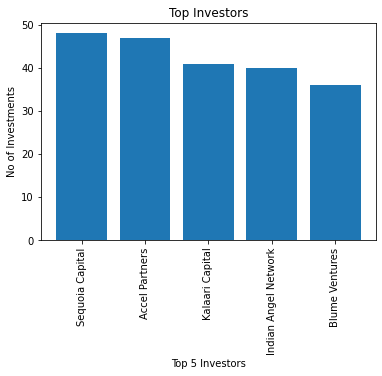

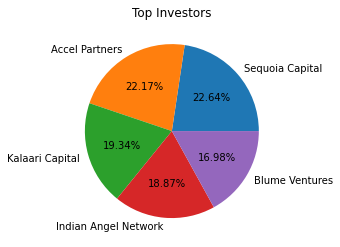

In [9]:
## 3
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Desktop/startup_funding.csv')

df=df.dropna(subset=['InvestorsName', 'StartupName'])
df['StartupName'].replace(['Ola Cabs','Olacabs'],'Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace(['Oyo Rooms','OyoRooms','OYO Rooms','Oyorooms'],'Oyo',inplace=True)

df=df[df.InvestorsName!='Undisclosed Investors']
df=df[df.InvestorsName!='Undisclosed investors']
df=df[df.InvestorsName!='undisclosed investors']
df=df[df.InvestorsName!='undisclosed Investor']

investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = s.split(',')
    
    for j in i:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df_n = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df_n = df_n.groupby('InvestorsName')['StartupName'].nunique()
df_n = df_n.sort_values(ascending = False)
investor = []
count = []
for i in range(5):
    print(df_n.index[i],df_n.values[i])
    investor.append(df_n.index[i])
    count.append(df_n.values[i])
    
plt.bar(investor,count)
plt.xticks(rotation=90)
plt.xlabel('Top 5 Investors')
plt.ylabel('No of Investments')
plt.title('Top Investors')
plt.show()

plt.pie(count,labels=investor,autopct='%.2f%%')
plt.title('Top Investors')
plt.show()

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


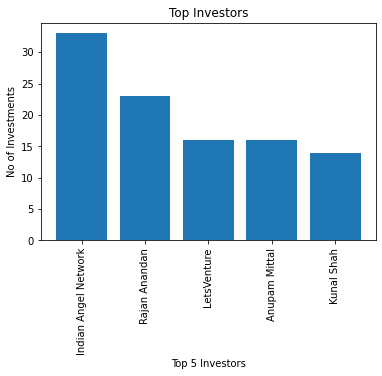

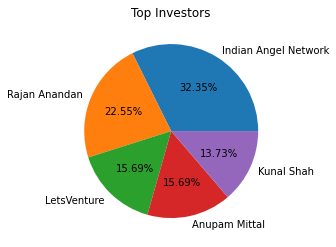

In [10]:
## 4
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Desktop/startup_funding.csv')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace(['Ola Cabs','Olacabs'],'Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace(['Oyo Rooms','OyoRooms','OYO Rooms','Oyorooms'],'Oyo',inplace=True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df = df[(df.InvestmentType == 'Crowd Funding') | (df.InvestmentType == 'Seed Funding')]

investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df_n = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df_n = df_n.groupby('InvestorsName')['StartupName'].nunique()
df_n = df_n.sort_values(ascending = False)

name = []
count = []
for i in range(5):
    print(df_n.index[i],df_n.values[i])
    name.append(df_n.index[i])
    count.append(df_n.values[i])
    
plt.bar(name,count)
plt.xticks(rotation=90)
plt.xlabel('Top 5 Investors')
plt.ylabel('No of Investments')
plt.title('Top Investors')
plt.show()

plt.pie(count,labels=name,autopct='%.2f%%')
plt.title('Top Investors')
plt.show()

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


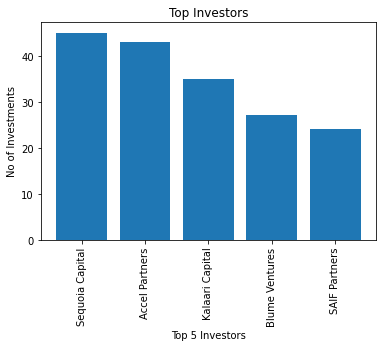

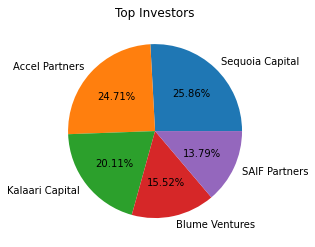

In [11]:
## 5
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Desktop/startup_funding.csv')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace(['Ola Cabs','Olacabs'],'Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace(['Oyo Rooms','OyoRooms','OYO Rooms','Oyorooms'],'Oyo',inplace=True)

df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df = df[df.InvestmentType == 'Private Equity']

investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df_n = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df_n = df_n.groupby('InvestorsName')['StartupName'].nunique()
df_n = df_n.sort_values(ascending = False)

name = []
count = []
for i in range(5):
    print(df_n.index[i],df_n.values[i])
    name.append(df_n.index[i])
    count.append(df_n.values[i])
    
plt.bar(name,count)
plt.xticks(rotation=90)
plt.xlabel('Top 5 Investors')
plt.ylabel('No of Investments')
plt.title('Top Investors')
plt.show()

plt.pie(count,labels=name,autopct='%.2f%%')
plt.title('Top Investors')
plt.show()